In [54]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import model_selection
from matplotlib.pylab import (
    figure,
    grid,
    legend,
    loglog,
    semilogx,
    show,
    subplot,
    title,
    xlabel,
    ylabel,
)

# I HAVEN'T LOOKED INTO IT YET, but I think we may have to combine the train and test data to do the preprocessing
# So far imma just do the training set
# Read the CSV file
titanic_data = pd.read_csv('../dataset/train.csv')

# Rename the data to a dataframe for semantics
df = titanic_data

# Take a quick look at the data again
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From our previous analysis, the fare price and the age were the only continuous variables that we identified in the dataset, and looking at the head() again, we can clearly see that this is the case again.

In our analysis, fare price is of the greatest interest (dependent variable) as it varies greatly in addition to having a tremendous amount of outliers in the dataset in the previous analysis. Attributes of interest (independent variables) in this case would be passenger class (pclass), sex, age, sipsp (siblings), parents (parch) and embarked.

To predict fare, pClass is of interest because certain classes in the titanic had certain thresholds in price. 

Age too, as typically young people would not be able to afford the vast sums of fare prices as older people would've had their whole lives to earn their fortunes, although exceptions to this might be people coming of age, who would've had their tickets bought by their relatives. 

Sex could also influence the fare prices as historically women weren't breadwinners and their tickets would then be paid for by a husband who could afford such fees. 

Sibsp and Parch are also of interest due to siblings and parent child combinations indicating family sizes and maybe larger family groups could get family discounts or maybe parents would spend less per child if they had a lot of them to keep the trip affordable.

Finally we have embarked, because perhaps we have ports such as Queentown being more busy than Cherbourg, which increases competition for tickets onboard the titanic, thereby driving up the prices from those ports.

So what is the goal of this particular regression analysis? 

We simply want to predict future fare price values based on our independent variables mentioned above and we want to find the optimal regression model that generalizes the best to new instances of data.

In [55]:
# Remember how there were a lot of missing values in our previous analysis, let's check for that again
missing_age = df['Age'].isna().sum()
print(f"Missing values in 'Age' column: {missing_age}")

missing_pClass = df['Pclass'].isna().sum()
print(f"Missing values in 'Pclass' column: {missing_pClass}")

missing_sex = df['Sex'].isna().sum()
print(f"Missing values in 'Sex' column: {missing_sex}")

missing_embarked = df['Embarked'].isna().sum()
print(f"Missing values in 'Embarked' column: {missing_embarked}")

missing_parch = df['Parch'].isna().sum()
print(f"Missing values in 'Parch' column: {missing_parch}")

missing_sibSp = df['SibSp'].isna().sum()
print(f"Missing values in 'SibSp' column: {missing_sibSp}")

missing_fare = df['Fare'].isna().sum()
print(f"Missing values in 'Fare' column: {missing_fare}")

# First, let's drop these irrelevant columns, because they don't really add much value to our analysis
df_clean = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin','Survived'])

df_clean.head()


Missing values in 'Age' column: 177
Missing values in 'Pclass' column: 0
Missing values in 'Sex' column: 0
Missing values in 'Embarked' column: 2
Missing values in 'Parch' column: 0
Missing values in 'SibSp' column: 0
Missing values in 'Fare' column: 0


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [56]:
# We need to do something about the missing values, especially with age
# We can fill the missing values with the median age
df_clean['Age'] = df_clean['Age'].fillna(df['Age'].median())

# We can fill out the missing values in the 'Embarked' column with the most common value
# We justify this because categorical values aren't numerical and we want them to be numerical so that we
# can perform regression with them
df_clean['Embarked'] = df_clean['Embarked'].fillna(df['Embarked'].mode()[0])

In [57]:
# Now let's feature transform the columns with string values to numerical values using one-hot encoding
# One-hot encode with dropfirst so that we dont need example male and female columns, we can just use male with 1 if true and 0 if female
df_clean = pd.get_dummies(df_clean, columns=['Sex', 'Pclass', 'Embarked'], drop_first=True)

# Now let's see how our data looks like
df_clean.head()

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,True,False,True,False,True
1,38.0,1,0,71.2833,False,False,False,False,False
2,26.0,0,0,7.9250,False,False,True,False,True
3,35.0,1,0,53.1000,False,False,False,False,True
4,35.0,0,0,8.0500,True,False,True,False,True


In [58]:
# Now finally, let's standardize the data
# Standardize the data using the StandardScaler import, mathematically this is fairly simple, as it involves Z scoring the data
# with Z = (X - myu) / sigma.
scaler = StandardScaler()

# Fit the scaler to the data
df_standardized = scaler.fit_transform(df_clean)

# df_standardized = pd.DataFrame(df_standardized, columns=df_clean.columns)
# df_standardized.head()


In [59]:
# Add offset column to allow for intercept in the model
# This is because the model is of the form y = Xw + b, where b is the intercept
# np.ones((df_standardized.shape[0], 1)) creates a column of ones with the same number of rows as the data
# np.hstack() stacks the column of ones to the left of the data and the second argument df_standardized
# tells us that this column of ones should be stacked to the left of df_standardized
X = np.hstack([np.ones((df_standardized.shape[0], 1)), df_standardized])
# Fare column is our target variable and we leave it unstandardized for now
y = df['Fare'].values 

M = X.shape[1]  # Number of features

print(f"Number of features: {M}")

# Now let's set up cross validation with 10 folds
K = 10  # Number of folds
CV = model_selection.KFold(K, shuffle=True)

Number of features: 10


In [60]:
# Like in our examples that we've looked through, we'll keep the lambda values 10^-5 to 10^8
lambdas = np.power(10.0, range(-2, 5))

# Initialize the training and test errors without regularization
Error_train = np.empty((K, 1))
Error_test = np.empty((K, 1))

# Initialize the training and test errors with regularization
Error_train_rlr = np.empty((K, 1))
Error_test_rlr = np.empty((K, 1))

# This w_rlr represents the weights for the regularized linear regression model
w_rlr = np.empty((M, K))

# Below arrays store the weights for each fold in the unregularized linear regression model
w_noreg = np.empty((M, K))

# Store errors across lambda values for plotting
train_err_vs_lambda = []
test_err_vs_lambda = [] 

In [61]:
# Imported the rlr_validate from the dtuimldmtools module

def rlr_validate(X, y, lambdas, cvf=10):
    """Validate regularized linear regression model using 'cvf'-fold cross validation.
    Find the optimal lambda (minimizing validation error) from 'lambdas' list.
    The loss function computed as mean squared error on validation set (MSE).
    Function returns: MSE averaged over 'cvf' folds, optimal value of lambda,
    average weight values for all lambdas, MSE train&validation errors for all lambdas.
    The cross validation splits are standardized based on the mean and standard
    deviation of the training set when estimating the regularization strength.

    Parameters:
    X       training data set
    y       vector of values
    lambdas vector of lambda values to be validated
    cvf     number of crossvalidation folds

    Returns:
    opt_val_err         validation error for optimum lambda
    opt_lambda          value of optimal lambda
    mean_w_vs_lambda    weights as function of lambda (matrix)
    train_err_vs_lambda train error as function of lambda (vector)
    test_err_vs_lambda  test error as function of lambda (vector)
    """
    CV = model_selection.KFold(cvf, shuffle=True)
    M = X.shape[1]
    w = np.empty((M, cvf, len(lambdas)))
    train_error = np.empty((cvf, len(lambdas)))
    test_error = np.empty((cvf, len(lambdas)))
    f = 0
    y = y.squeeze()
    # The first outer fold as input to this is the training set from 10% to 100%,
    # then the next time it's 0% to 10% and 20% to 100% and so on

    # This is the inner fold which we will loop over all the lambda values
    for train_index, test_index in CV.split(X, y):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]

        """
        We have already standardized the data, so we don't need to do it again

        # Standardize the training and set set based on training set moments
        mu = np.mean(X_train[:, 1:], 0)
        sigma = np.std(X_train[:, 1:], 0)

        X_train[:, 1:] = (X_train[:, 1:] - mu) / sigma
        X_test[:, 1:] = (X_test[:, 1:] - mu) / sigma

        """
        # precompute terms as they will be used multiple times in the for loop below
        Xty = X_train.T @ y_train
        XtX = X_train.T @ X_train
        # Go through each lambda in the lambdas array
        for l in range(0, len(lambdas)):
            # Compute parameters for current value of lambda and current CV fold
            # note: "linalg.lstsq(a,b)" is substitue for Matlab's left division operator "\"
            # LambdaI is the regularization term remember Lambda * I in the w* = (X^T*X + lambda*I)^-1 * X^T*y
            lambdaI = lambdas[l] * np.eye(M)
            # remove bias regularization because the first column of X is the bias term and M is the number of columns in the
            # training set X, and this should not be regularized because it is not a feature
            lambdaI[0, 0] = 0
            # Below calculates the ridge regression weights for a given lambda in the fth fold and stores it in w. With this we want to
            # find the weights that minimize the loss function, which is the mean squared error whilst penalizing large weights
            # Below we get a 3d array of weights, where the first dimension holds the weights for each feature, the second dimension is the
            # for each fold f and the third dimension is for each lambda value.
            w[:, f, l] = np.linalg.solve(XtX + lambdaI, Xty).squeeze()

            # Evaluate training and test performance
            # The mean squared error is calculated for the training and test set for each lambda value
            # We take the expected output y_train - X_train * all of our recently calculated weights from the linalg.solve() above and square it
            train_error[f, l] = np.power(y_train - X_train @ w[:, f, l].T, 2).mean(
                axis=0
            )
            test_error[f, l] = np.power(y_test - X_test @ w[:, f, l].T, 2).mean(axis=0)

        f = f + 1

    # test_error is a 2d array where the rows (this example two folds only) are the inner folds 
    # and the columns are the lambda values (this case 3) that were computed with teh mean squared error
    # if we have [0.5, 0.6, 0.8],  
    #            [0.4, 0.5, 0.7],
    # The mean() function will take the mean of the columns, so we will get [0.45, 0.55, 0.75]
    # then np.min will take the minimum value of that so we get 0.45
    opt_val_err = np.min(np.mean(test_error, axis=0))
    # Take the [0.45, 0.55, 0.75] example above, and np.argmin will return the index of the minimum value
    # Then we use that index, 0 in this case to get the lambda value that gave us the minimum mean squared error
    opt_lambda = lambdas[np.argmin(np.mean(test_error, axis=0))]
    # Using the matrix example above: The mean() function will take the mean of the columns,  [0.45, 0.55, 0.75]
    # np.mean(train_error, axis=0) computes the mean of the training errors across all folds for each lambda value.
    train_err_vs_lambda = np.mean(train_error, axis=0)
    # Same as above only for test error
    test_err_vs_lambda = np.mean(test_error, axis=0)
    # The mean of the weights across all folds for each lambda value
    mean_w_vs_lambda = np.squeeze(np.mean(w, axis=1))

    return (
        opt_val_err,
        opt_lambda,
        mean_w_vs_lambda,
        train_err_vs_lambda,
        test_err_vs_lambda,
    )


optimal validation error:  1.0620481318499653e-06
optimal validation error:  9.64654591313365e-07
optimal validation error:  9.823161022066977e-07
optimal validation error:  1.4175880703640015e-06
optimal validation error:  9.618873923890326e-07
optimal validation error:  9.419128660739492e-07
optimal validation error:  9.309947975599754e-07
optimal validation error:  9.348167652932337e-07
optimal validation error:  9.152476639012864e-07
optimal validation error:  1.093255784316408e-06
hei


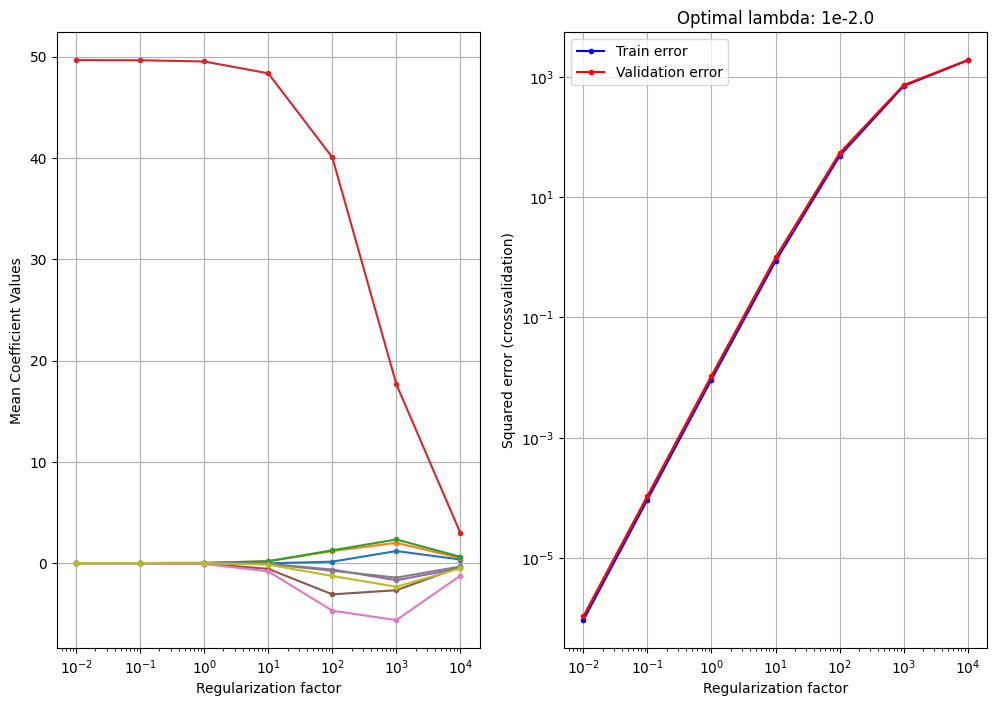

In [ ]:
k = 0
# Start the cross validation by 
for train_index, test_index in CV.split(X, y):
    # extract training and test set for current CV fold
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    internal_cross_validation = 10

    # Apply internal cross validation across multiple values of lambda 10^-5 to 10^8 to find the best
    # lambda value for the regularization effect, so for each lambda value, we estimate the model's
    # performance on the training set and the validation set
    (
        opt_val_err, # Minimum validation error across all tested values of lambda
        opt_lambda, # The lambda value that gave the minimum validation error
        mean_w_vs_lambda, # For each tested lambda, the function computed the mean of each weight, so higher values of lambda will result in smaller weights
        train_err_vs_lambda, # This array stores the training error (mean squared error) for each tested lambda
        test_err_vs_lambda, # This array stores the validation error (mean squared error) for each tested lambda
    ) = rlr_validate(X_train, y_train, lambdas, internal_cross_validation)

    # In the exercise, the dataset is standardized within the rlr_validate folds individually as well as 
    # in the outer fold here. This is not necessary, as the data is already standardized before the cross validation
    # So we'll go straight to defining the XtX and Xty terms for the training set to find 
    # the optimal w* = (X^T*X + lambda*I)^-1 * X^T*y

    # We need these two below for the optimal w* = (X^T*X + lambda*I)^-1 * X^T*y
    Xty = X_train.T @ y_train
    XtX = X_train.T @ X_train

    # Estimate weights for the optimal value of lambda, on entire training set
    lambdaI = opt_lambda * np.eye(M)
    lambdaI[0, 0] = 0  # Do no regularize the bias term

    # Find the optimal weights for the regularized linear regression model
    # Each column corresponds to the weights for each attribute in the given fold
    w_rlr[:, k] = np.linalg.solve(XtX + lambdaI, Xty).squeeze()

    # Compute mean squared error with regularization with optimal lambda now that we have our weights from 
    # the "optimal" lambda of the inner cross validation
    Error_train_rlr[k] = (
        np.square(y_train - X_train @ w_rlr[:, k]).sum(axis=0) / y_train.shape[0]
    )
    Error_test_rlr[k] = (
        np.square(y_test - X_test @ w_rlr[:, k]).sum(axis=0) / y_test.shape[0]
    )

    # Let's compute the training and test errors without the regularization term lambda

    # Estimate weights for unregularized linear regression, on entire training set
    w_noreg[:, k] = np.linalg.solve(XtX, Xty).squeeze()
    # Compute mean squared error without regularization
    Error_train[k] = (
        np.square(y_train - X_train @ w_noreg[:, k]).sum(axis=0) / y_train.shape[0]
    )
    Error_test[k] = (
        np.square(y_test - X_test @ w_noreg[:, k]).sum(axis=0) / y_test.shape[0]
    )

        # Display the results for the last cross-validation fold
    if k == K - 1:
        figure(k, figsize=(12, 8))
        subplot(1, 2, 1)
        semilogx(lambdas, mean_w_vs_lambda.T[:, 1:], ".-")  # Don't plot the bias term
        xlabel("Regularization factor")
        ylabel("Mean Coefficient Values")
        grid()
        # You can choose to display the legend, but it's omitted for a cleaner
        # plot, since there are many attributes
        # legend(attributeNames[1:], loc='best')

        subplot(1, 2, 2)
        title("Optimal lambda: 1e{0}".format(np.log10(opt_lambda)))
        loglog(
            lambdas, train_err_vs_lambda.T, "b.-", lambdas, test_err_vs_lambda.T, "r.-"
        )
        xlabel("Regularization factor")
        ylabel("Squared error (crossvalidation)")
        legend(["Train error", "Validation error"])
        grid()

    # To inspect the used indices, use these print statements
    # print('Cross validation fold {0}/{1}:'.format(k+1,K))
    # print('Train indices: {0}'.format(train_index))
    # print('Test indices: {0}\n'.format(test_index))

    k += 1
    
print("hei")
